<a href="https://colab.research.google.com/github/Varmai/ML-Notebooks/blob/main/Time_Series_Forecasting_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
This dataset has been compiled from public sources. The dataset consists of daily temperatures and precipitation from 13 Canadian centres. Precipitation is either rain or snow (likely snow in winter months). In 1940, there is daily data for seven out of the 13 centres, but by 1960 there is daily data from all 13 centres, with the occasional missing value. So, let's consider the data from 1961 & impute for those missing values after 1961.

Few of Canada’s weather stations have been operating continuously, so we did need to patch together the data. Our source data is from https://climate-change.canada.ca/climate-data/#/daily-climate-data

In [1]:
import pandas as pd
import numpy as np

Importing the data

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/Varmai/Data-sets/main/Canadian_climate_history.csv')

In [42]:
df.head()

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,...,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,02-Jan-1940 00:00:00,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,...,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,03-Jan-1940 00:00:00,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,...,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,04-Jan-1940 00:00:00,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,...,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0
4,05-Jan-1940 00:00:00,-13.1,0.5,NaN,NaN,NaN,NaN,-8.1,0.0,NaN,...,NaN,NaN,-7.2,16.5,7.0,0.8,NaN,NaN,-18.7,0.0


In [43]:
df.isna().sum()

LOCAL_DATE                           0
MEAN_TEMPERATURE_CALGARY           189
TOTAL_PRECIPITATION_CALGARY        173
MEAN_TEMPERATURE_EDMONTON         7657
TOTAL_PRECIPITATION_EDMONTON      7646
MEAN_TEMPERATURE_HALIFAX          7164
TOTAL_PRECIPITATION_HALIFAX       7226
MEAN_TEMPERATURE_MONCTON          2336
TOTAL_PRECIPITATION_MONCTON       2767
MEAN_TEMPERATURE_MONTREAL          755
TOTAL_PRECIPITATION_MONTREAL       730
MEAN_TEMPERATURE_OTTAWA             76
TOTAL_PRECIPITATION_OTTAWA          81
MEAN_TEMPERATURE_QUEBEC           1214
TOTAL_PRECIPITATION_QUEBEC        1227
MEAN_TEMPERATURE_SASKATOON        2473
TOTAL_PRECIPITATION_SASKATOON     3755
MEAN_TEMPERATURE_STJOHNS           808
TOTAL_PRECIPITATION_STJOHNS        822
MEAN_TEMPERATURE_TORONTO            74
TOTAL_PRECIPITATION_TORONTO         80
MEAN_TEMPERATURE_VANCOUVER          53
TOTAL_PRECIPITATION_VANCOUVER       55
MEAN_TEMPERATURE_WHITEHORSE       1691
TOTAL_PRECIPITATION_WHITEHORSE    4095
MEAN_TEMPERATURE_WINNIPEG

Seems the data is taken 12 in the night everyday. So, the frquency of the data here is dialy.

Let check for null values & significant features

In [4]:
tabel = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df)*100,
    'NaN':df.isna().sum(),
    'Type':df.dtypes.values,
})
tabel

,Unique,Null,NullPercent,NaN,Type
LOCAL_DATE,29221,0,0.000000,0,object
MEAN_TEMPERATURE_CALGARY,576,189,0.646795,189,float64
TOTAL_PRECIPITATION_CALGARY,318,173,0.592040,173,float64
MEAN_TEMPERATURE_EDMONTON,603,7657,26.203758,7657,float64
TOTAL_PRECIPITATION_EDMONTON,297,7646,26.166113,7646,float64
MEAN_TEMPERATURE_HALIFAX,472,7164,24.516615,7164,float64
TOTAL_PRECIPITATION_HALIFAX,586,7226,24.728791,7226,float64
MEAN_TEMPERATURE_MONCTON,510,2336,7.994251,2336,float64
TOTAL_PRECIPITATION_MONCTON,484,2767,9.469217,2767,float64
MEAN_TEMPERATURE_MONTREAL,1050,755,2.583758,755,float64


In [5]:
# convert the date column to a datetime object
df['LOCAL_DATE'] = pd.to_datetime(df['LOCAL_DATE'])

# create a new column for the year
df['year'] = df['LOCAL_DATE'].dt.year

# filter the dataframe to only include data from the year 1961
df = df.loc[df['year'] >= 1961]

In [6]:
df

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG,year
7671,1961-01-01,-7.5,0.0,-11.1,0.3,-0.6,32.0,-6.2,48.3,-10.3,...,0.0,-5.6,0.0,4.5,0.3,-7.8,0.3,-27.0,1.0,1961
7672,1961-01-02,-5.0,0.0,-7.8,0.0,0.0,0.5,-4.7,2.5,-10.8,...,14.5,-7.0,2.8,2.8,0.0,-3.3,0.0,-25.9,0.0,1961
7673,1961-01-03,3.1,0.0,-3.1,0.0,-3.9,4.1,-10.0,0.0,-12.8,...,0.0,-5.6,0.8,3.1,1.8,-3.4,0.3,-23.3,0.0,1961
7674,1961-01-04,1.4,0.0,-2.5,0.0,-5.6,43.7,-7.8,53.1,-13.4,...,8.6,-8.6,0.0,5.6,32.0,-4.8,0.0,-11.4,0.0,1961
7675,1961-01-05,2.0,0.0,-2.5,0.0,-9.2,0.5,-10.8,0.0,-15.3,...,1.5,-6.4,0.0,6.1,14.0,-16.1,0.0,-8.4,0.0,1961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29216,2019-12-28,-7.7,0.0,-10.4,0.0,2.1,0.0,0.5,NaN,1.3,...,5.3,3.0,0.2,5.3,3.0,-9.0,NaN,-4.7,0.0,2019
29217,2019-12-29,-3.3,0.0,-8.6,0.0,-2.7,0.0,-3.8,NaN,-0.9,...,5.6,1.1,7.8,7.1,2.4,-2.8,NaN,-10.6,1.7,2019
29218,2019-12-30,-1.6,0.0,-10.3,0.0,-3.5,0.0,-4.1,NaN,-2.3,...,0.7,5.6,8.0,7.5,5.8,-0.1,NaN,-10.9,0.1,2019
29219,2019-12-31,4.3,0.0,-2.6,0.0,0.0,11.4,-1.0,NaN,-0.2,...,0.0,0.4,2.0,8.4,21.2,-1.1,NaN,-12.3,0.0,2019


In [7]:
df = df.drop(columns=['year'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21550 entries, 7671 to 29220
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   LOCAL_DATE                      21550 non-null  datetime64[ns]
 1   MEAN_TEMPERATURE_CALGARY        21361 non-null  float64       
 2   TOTAL_PRECIPITATION_CALGARY     21377 non-null  float64       
 3   MEAN_TEMPERATURE_EDMONTON       21456 non-null  float64       
 4   TOTAL_PRECIPITATION_EDMONTON    21442 non-null  float64       
 5   MEAN_TEMPERATURE_HALIFAX        21470 non-null  float64       
 6   TOTAL_PRECIPITATION_HALIFAX     21408 non-null  float64       
 7   MEAN_TEMPERATURE_MONCTON        19214 non-null  float64       
 8   TOTAL_PRECIPITATION_MONCTON     18787 non-null  float64       
 9   MEAN_TEMPERATURE_MONTREAL       21427 non-null  float64       
 10  TOTAL_PRECIPITATION_MONTREAL    21429 non-null  float64       
 11 

Let's convert ```LOCAL_DATE```to date_time python format

In [9]:
df['LOCAL_DATE'] = pd.to_datetime(df.LOCAL_DATE)
df.set_index('LOCAL_DATE', inplace=True)

Now let's check for distributions of data

In [10]:
df.describe()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
count,21361.000000,21377.000000,21456.000000,21442.000000,21470.000000,21408.000000,19214.000000,18787.000000,21427.000000,21429.000000,...,21476.000000,21459.000000,21480.000000,21470.000000,21498.000000,21495.000000,20682.000000,18277.000000,21426.000000,21303.000000
mean,4.241290,1.152234,2.306185,1.243564,6.533805,3.974673,5.224279,3.345473,6.658158,2.655686,...,5.038392,4.056207,7.932728,2.157550,10.234073,3.210291,-0.410226,0.739870,3.117539,1.437035
std,10.912449,3.797230,12.289845,3.885045,9.641229,9.263931,10.612749,7.619873,11.927170,6.169324,...,8.204249,8.120892,10.692840,5.549774,5.798619,6.510521,12.789036,1.990205,14.401152,4.714749
min,-36.400000,0.000000,-40.800000,0.000000,-23.500000,0.000000,-27.400000,0.000000,-30.400000,0.000000,...,-21.300000,0.000000,-24.700000,0.000000,-14.500000,0.000000,-46.700000,0.000000,-38.600000,0.000000
25%,-2.200000,0.000000,-5.800000,0.000000,-0.800000,0.000000,-2.575000,0.000000,-2.325000,0.000000,...,-1.100000,0.000000,-0.200000,0.000000,6.000000,0.000000,-8.300000,0.000000,-7.900000,0.000000
50%,5.500000,0.000000,4.200000,0.000000,6.900000,0.000000,5.700000,0.000000,7.500000,0.000000,...,4.600000,0.500000,8.300000,0.000000,10.000000,0.000000,1.900000,0.000000,5.000000,0.000000
75%,13.000000,0.400000,12.600000,0.600000,14.800000,3.000000,14.300000,2.800000,17.000000,2.100000,...,11.600000,4.275000,17.200000,1.400000,15.000000,3.600000,9.900000,0.400000,15.600000,0.550000
max,26.200000,92.600000,24.700000,75.600000,27.000000,218.200000,27.200000,131.800000,30.300000,93.500000,...,25.200000,99.400000,31.800000,126.000000,28.400000,91.600000,23.900000,44.900000,30.900000,83.800000


In [11]:
df1 = df.dropna()

In [12]:
from scipy.stats import skew

# calculate the skewness of a dataset
skewness = skew(df1)

print(skewness)

[-0.72489718  7.48071517 -0.65465651  6.81636947 -0.24467973  4.29115066
 -0.29770811  4.32989344 -0.35715699  4.10186357 -0.3485634   4.58059317
 -0.34929161  3.75249561 -0.4950611   8.81930864 -0.01097092  3.57593162
 -0.23965883  4.97317479 -0.16504525  3.54043239 -0.80175879  5.49789656
 -0.41678564  6.80715977]


The skewness index is a measure of the asymmetry of the distribution. A positive skewness coefficient indicates a right-skewed distribution, while a negative skewness coefficient indicates a left-skewed distribution. A skewness coefficient of zero indicates a symmetrical distribution.

# Ranges of distributions

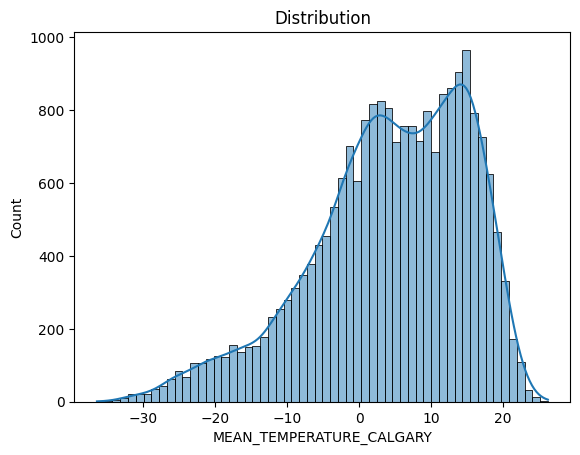

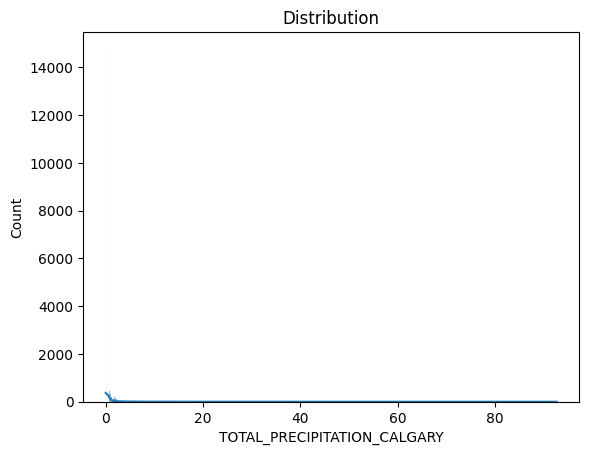

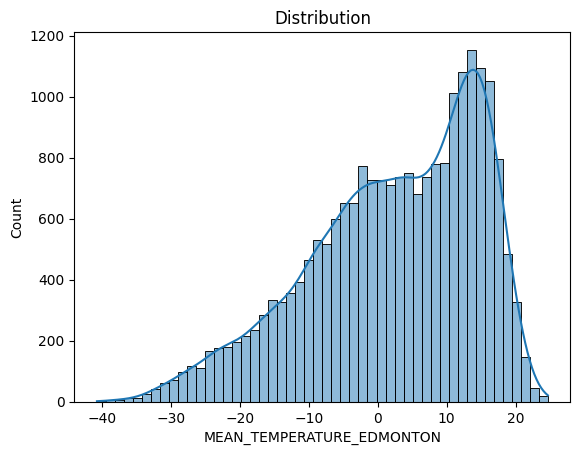

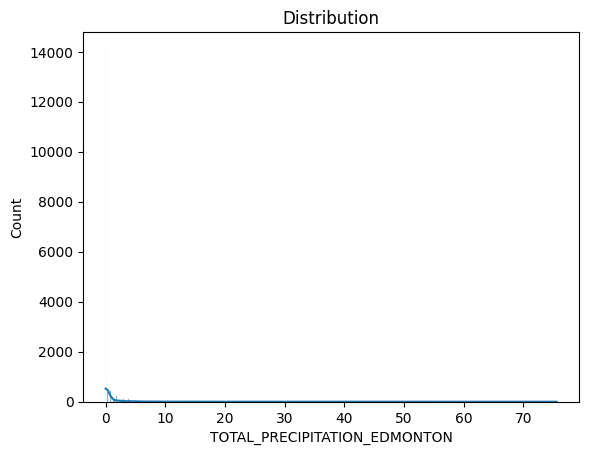

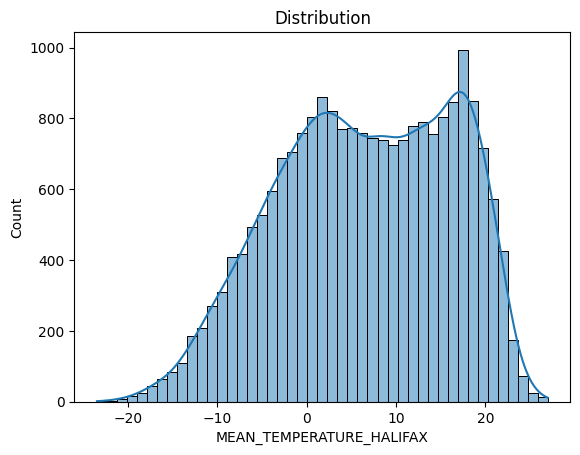

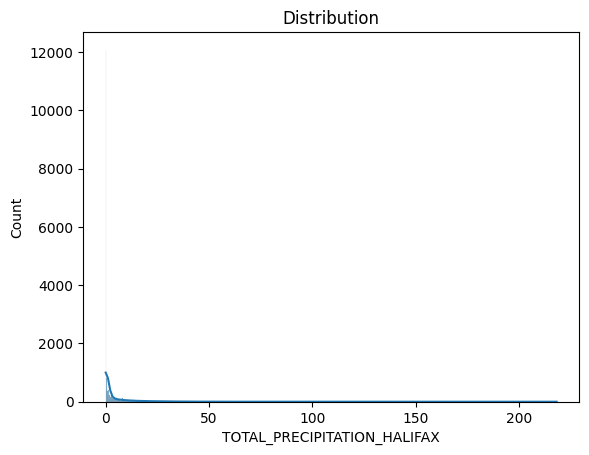

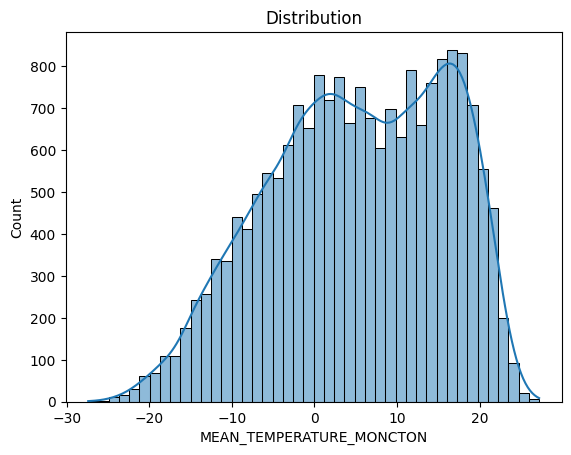

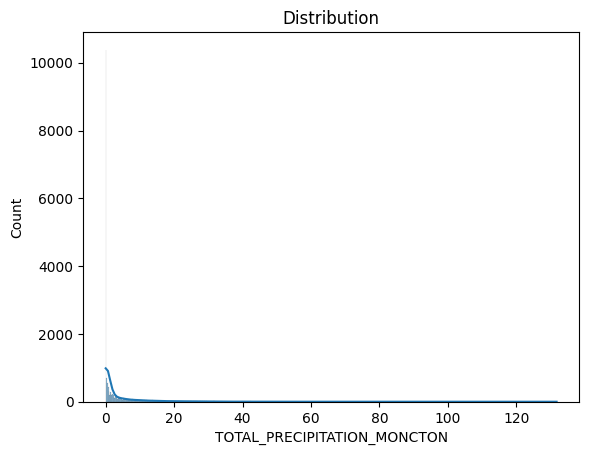

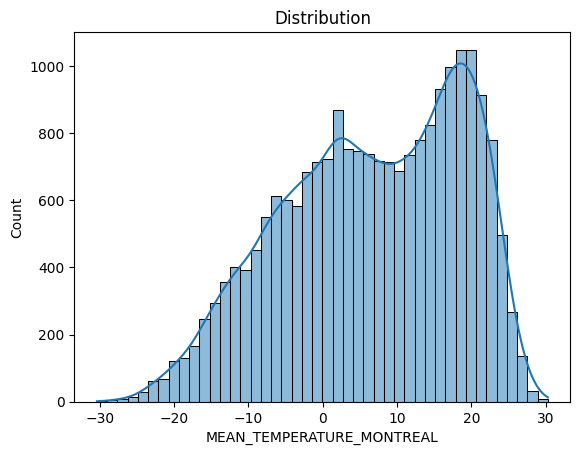

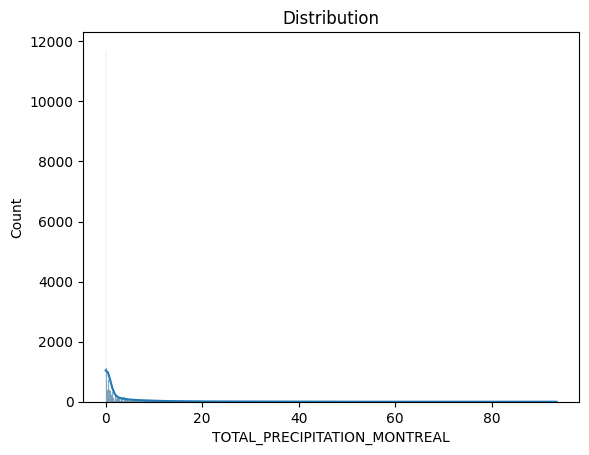

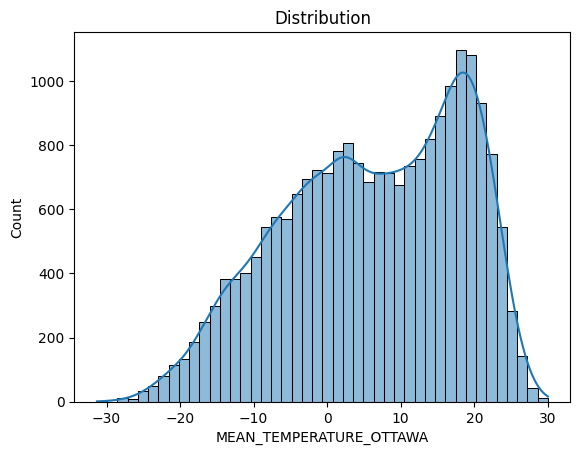

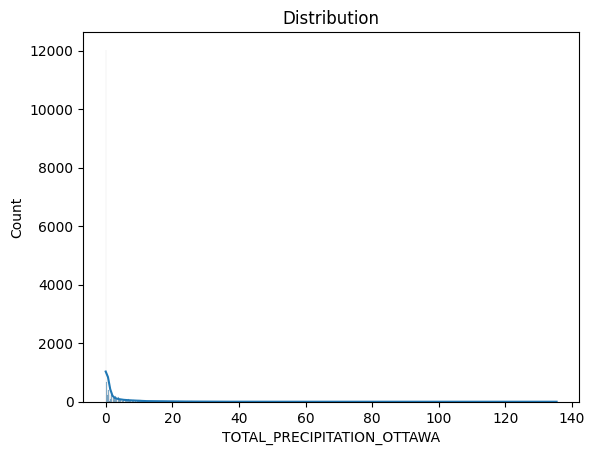

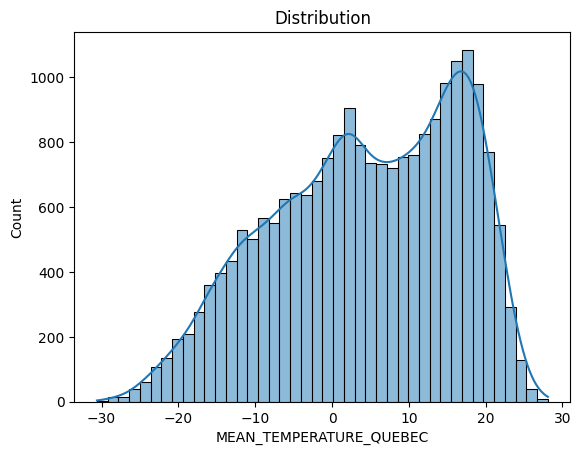

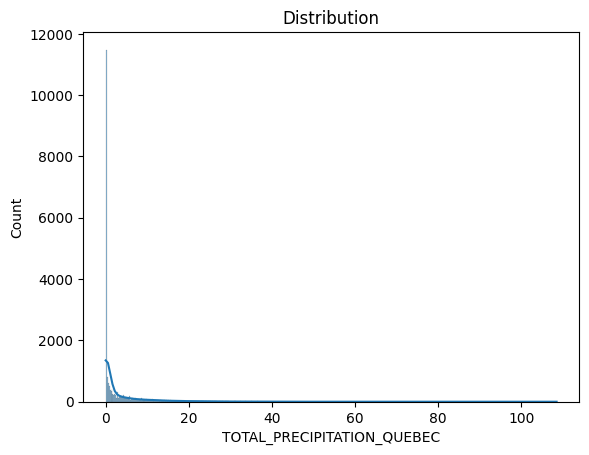

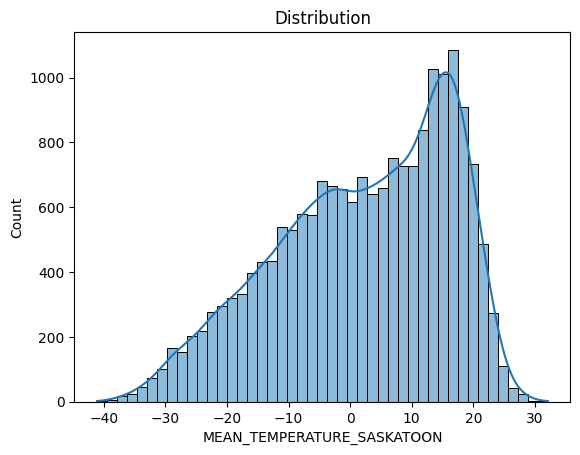

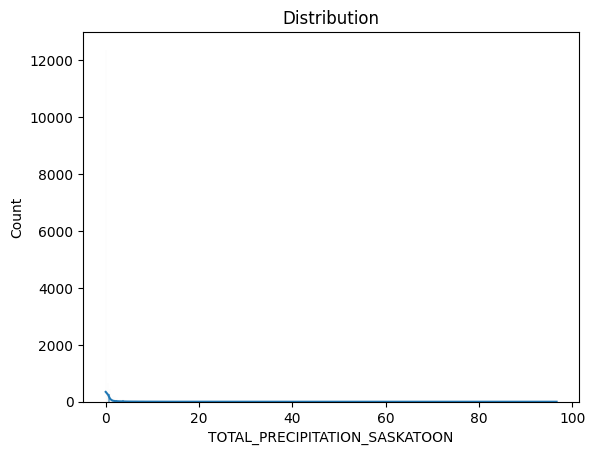

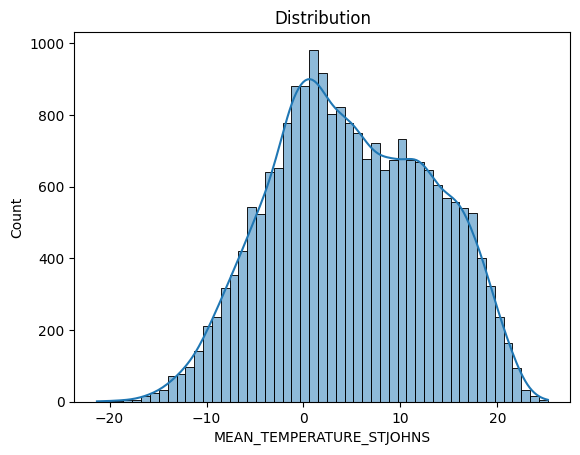

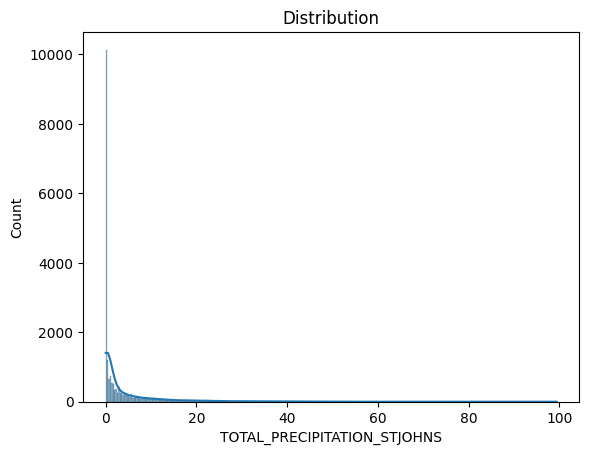

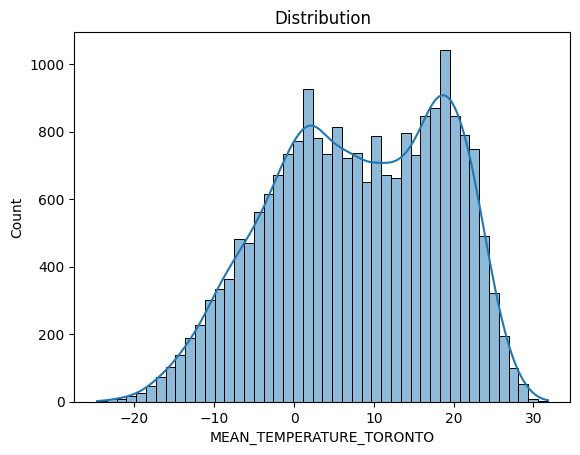

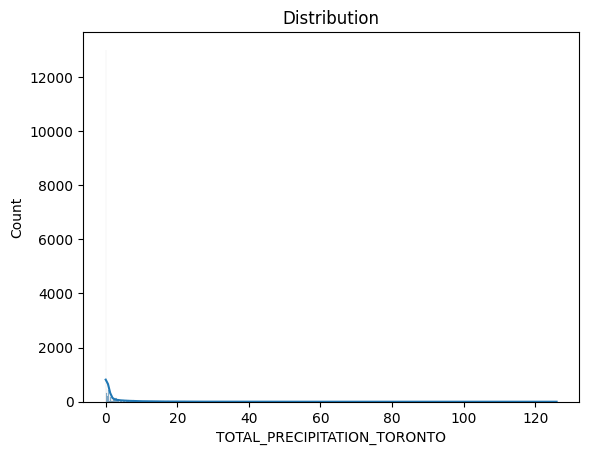

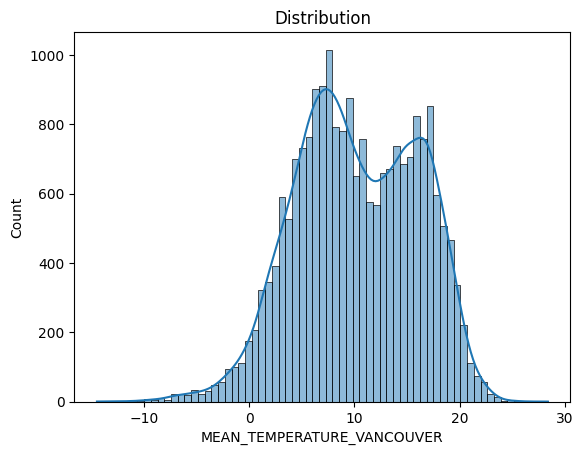

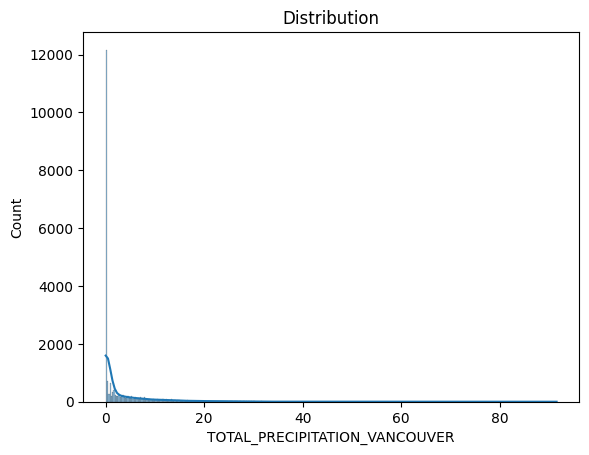

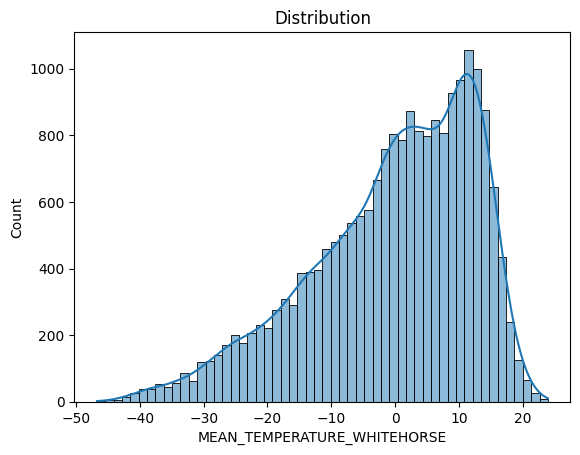

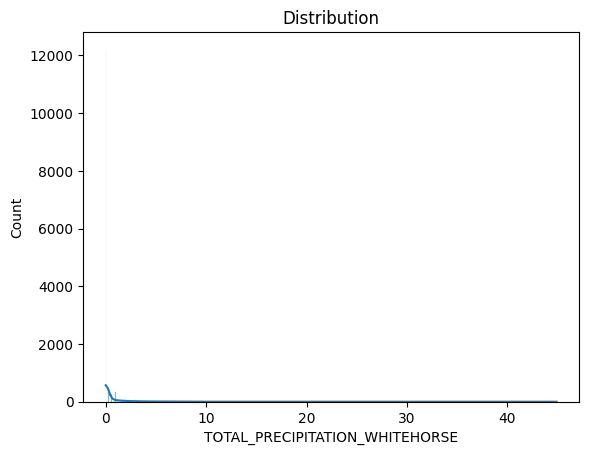

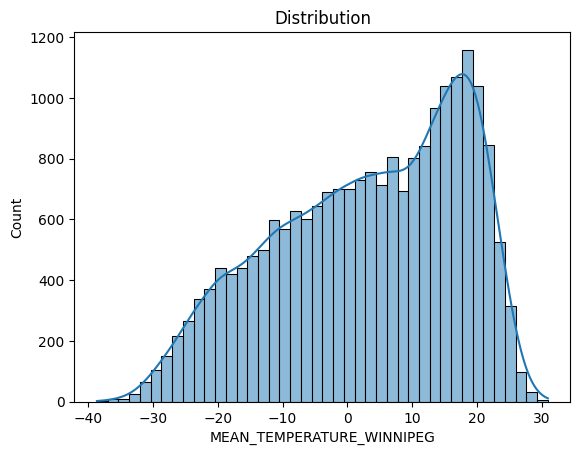

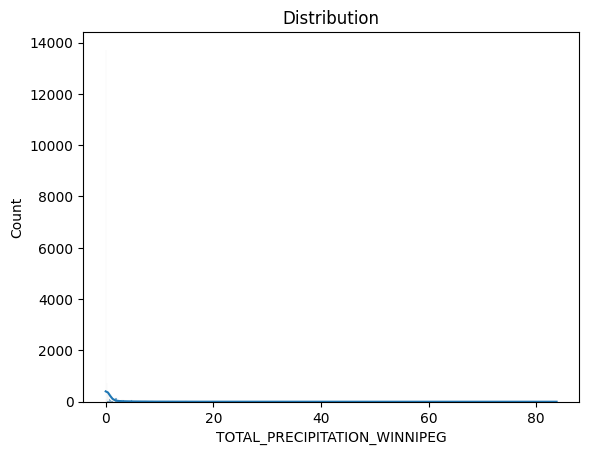

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in df:
  sns.histplot(data=df,x=feature,kde=True)
  plt.title(label='Distribution')
  plt.show()
     

# Imputation

Let's impute using different techniques & can check which technique gives better results.

## Interpolation methods

### Time Interpolation example

In [14]:
import pandas as pd
import numpy as np

# create a sample dataframe with missing values
example = pd.DataFrame({'date': pd.date_range('2021-01-01', periods=10, freq='D'),
                   'value': [1, np.nan, 5, 7, np.nan, np.nan, 3, 1, np.nan, 10]})

# set the index of the dataframe to the date column
example = example.set_index('date')

# interpolate the missing values using time interpolation
df_interpolated = example.interpolate(method='time')

# print the original dataframe and the interpolated dataframe
print('Original dataframe:\n', example)
print('\nInterpolated dataframe:\n', df_interpolated)

Original dataframe:
             value
date             
2021-01-01    1.0
2021-01-02    NaN
2021-01-03    5.0
2021-01-04    7.0
2021-01-05    NaN
2021-01-06    NaN
2021-01-07    3.0
2021-01-08    1.0
2021-01-09    NaN
2021-01-10   10.0

Interpolated dataframe:
                 value
date                 
2021-01-01   1.000000
2021-01-02   3.000000
2021-01-03   5.000000
2021-01-04   7.000000
2021-01-05   5.666667
2021-01-06   4.333333
2021-01-07   3.000000
2021-01-08   1.000000
2021-01-09   5.500000
2021-01-10  10.000000


In [15]:
df.describe()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
count,21361.000000,21377.000000,21456.000000,21442.000000,21470.000000,21408.000000,19214.000000,18787.000000,21427.000000,21429.000000,...,21476.000000,21459.000000,21480.000000,21470.000000,21498.000000,21495.000000,20682.000000,18277.000000,21426.000000,21303.000000
mean,4.241290,1.152234,2.306185,1.243564,6.533805,3.974673,5.224279,3.345473,6.658158,2.655686,...,5.038392,4.056207,7.932728,2.157550,10.234073,3.210291,-0.410226,0.739870,3.117539,1.437035
std,10.912449,3.797230,12.289845,3.885045,9.641229,9.263931,10.612749,7.619873,11.927170,6.169324,...,8.204249,8.120892,10.692840,5.549774,5.798619,6.510521,12.789036,1.990205,14.401152,4.714749
min,-36.400000,0.000000,-40.800000,0.000000,-23.500000,0.000000,-27.400000,0.000000,-30.400000,0.000000,...,-21.300000,0.000000,-24.700000,0.000000,-14.500000,0.000000,-46.700000,0.000000,-38.600000,0.000000
25%,-2.200000,0.000000,-5.800000,0.000000,-0.800000,0.000000,-2.575000,0.000000,-2.325000,0.000000,...,-1.100000,0.000000,-0.200000,0.000000,6.000000,0.000000,-8.300000,0.000000,-7.900000,0.000000
50%,5.500000,0.000000,4.200000,0.000000,6.900000,0.000000,5.700000,0.000000,7.500000,0.000000,...,4.600000,0.500000,8.300000,0.000000,10.000000,0.000000,1.900000,0.000000,5.000000,0.000000
75%,13.000000,0.400000,12.600000,0.600000,14.800000,3.000000,14.300000,2.800000,17.000000,2.100000,...,11.600000,4.275000,17.200000,1.400000,15.000000,3.600000,9.900000,0.400000,15.600000,0.550000
max,26.200000,92.600000,24.700000,75.600000,27.000000,218.200000,27.200000,131.800000,30.300000,93.500000,...,25.200000,99.400000,31.800000,126.000000,28.400000,91.600000,23.900000,44.900000,30.900000,83.800000


In [16]:
time_impute = df.interpolate(option='time')

In [17]:
time_impute.describe()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
count,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,...,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000
mean,4.215552,1.149849,2.285492,1.241457,6.527742,3.966483,5.762923,3.198789,6.640879,2.655290,...,5.046125,4.053114,7.926174,2.155206,10.234042,3.208371,-0.726601,0.644258,3.087640,1.438095
std,10.915089,3.789083,12.298979,3.877609,9.640443,9.246383,10.143308,7.124914,11.928321,6.158907,...,8.202868,8.109249,10.688108,5.541641,5.800926,6.504649,12.763433,1.850948,14.404988,4.702613
min,-36.400000,0.000000,-40.800000,0.000000,-23.500000,0.000000,-27.400000,0.000000,-30.400000,0.000000,...,-21.300000,0.000000,-24.700000,0.000000,-14.500000,0.000000,-46.700000,0.000000,-38.600000,0.000000
25%,-2.200000,0.000000,-5.900000,0.000000,-0.800000,0.000000,-1.500000,0.000000,-2.350000,0.000000,...,-1.100000,0.000000,-0.200000,0.000000,6.000000,0.000000,-8.900000,0.000000,-8.000000,0.000000
50%,5.500000,0.000000,4.200000,0.000000,6.900000,0.000000,7.800000,0.400000,7.500000,0.000000,...,4.600000,0.500000,8.200000,0.000000,10.000000,0.000000,1.400000,0.000000,5.000000,0.000000
75%,13.000000,0.400000,12.600000,0.600000,14.800000,3.000000,13.400000,2.200000,17.000000,2.200000,...,11.600000,4.300000,17.200000,1.400000,15.000000,3.600000,9.700000,0.400000,15.600000,0.600000
max,26.200000,92.600000,24.700000,75.600000,27.000000,218.200000,27.200000,131.800000,30.300000,93.500000,...,25.200000,99.400000,31.800000,126.000000,28.400000,91.600000,23.900000,44.900000,30.900000,83.800000


In [18]:
time_impute

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,
1961-01-01,-7.5,0.0,-11.1,0.3,-0.6,32.0,-6.2,48.3,-10.3,14.2,...,-6.4,0.0,-5.6,0.0,4.5,0.3,-7.8,0.3,-27.0,1.0
1961-01-02,-5.0,0.0,-7.8,0.0,0.0,0.5,-4.7,2.5,-10.8,0.5,...,-2.8,14.5,-7.0,2.8,2.8,0.0,-3.3,0.0,-25.9,0.0
1961-01-03,3.1,0.0,-3.1,0.0,-3.9,4.1,-10.0,0.0,-12.8,0.3,...,-1.7,0.0,-5.6,0.8,3.1,1.8,-3.4,0.3,-23.3,0.0
1961-01-04,1.4,0.0,-2.5,0.0,-5.6,43.7,-7.8,53.1,-13.4,0.5,...,-1.4,8.6,-8.6,0.0,5.6,32.0,-4.8,0.0,-11.4,0.0
1961-01-05,2.0,0.0,-2.5,0.0,-9.2,0.5,-10.8,0.0,-15.3,0.0,...,-1.4,1.5,-6.4,0.0,6.1,14.0,-16.1,0.0,-8.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,-7.7,0.0,-10.4,0.0,2.1,0.0,0.5,2.2,1.3,0.0,...,-4.3,5.3,3.0,0.2,5.3,3.0,-9.0,0.0,-4.7,0.0
2019-12-29,-3.3,0.0,-8.6,0.0,-2.7,0.0,-3.8,2.2,-0.9,0.0,...,-0.9,5.6,1.1,7.8,7.1,2.4,-2.8,0.0,-10.6,1.7
2019-12-30,-1.6,0.0,-10.3,0.0,-3.5,0.0,-4.1,2.2,-2.3,13.4,...,-0.7,0.7,5.6,8.0,7.5,5.8,-0.1,0.0,-10.9,0.1


In [19]:
time_impute.isna().sum()

MEAN_TEMPERATURE_CALGARY          0
TOTAL_PRECIPITATION_CALGARY       0
MEAN_TEMPERATURE_EDMONTON         0
TOTAL_PRECIPITATION_EDMONTON      0
MEAN_TEMPERATURE_HALIFAX          0
TOTAL_PRECIPITATION_HALIFAX       0
MEAN_TEMPERATURE_MONCTON          0
TOTAL_PRECIPITATION_MONCTON       0
MEAN_TEMPERATURE_MONTREAL         0
TOTAL_PRECIPITATION_MONTREAL      0
MEAN_TEMPERATURE_OTTAWA           0
TOTAL_PRECIPITATION_OTTAWA        0
MEAN_TEMPERATURE_QUEBEC           0
TOTAL_PRECIPITATION_QUEBEC        0
MEAN_TEMPERATURE_SASKATOON        0
TOTAL_PRECIPITATION_SASKATOON     0
MEAN_TEMPERATURE_STJOHNS          0
TOTAL_PRECIPITATION_STJOHNS       0
MEAN_TEMPERATURE_TORONTO          0
TOTAL_PRECIPITATION_TORONTO       0
MEAN_TEMPERATURE_VANCOUVER        0
TOTAL_PRECIPITATION_VANCOUVER     0
MEAN_TEMPERATURE_WHITEHORSE       0
TOTAL_PRECIPITATION_WHITEHORSE    0
MEAN_TEMPERATURE_WINNIPEG         0
TOTAL_PRECIPITATION_WINNIPEG      0
dtype: int64

## Visualising the data after imputation.

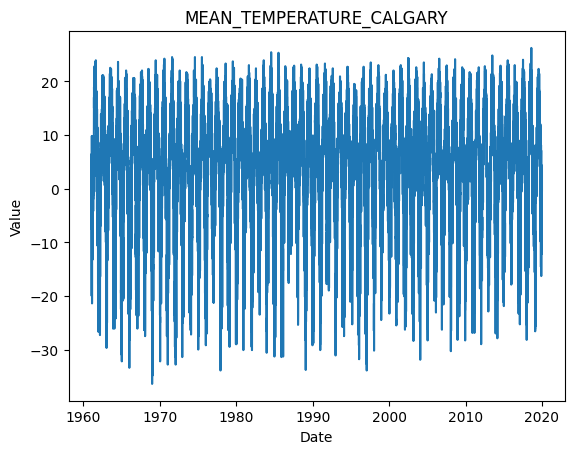

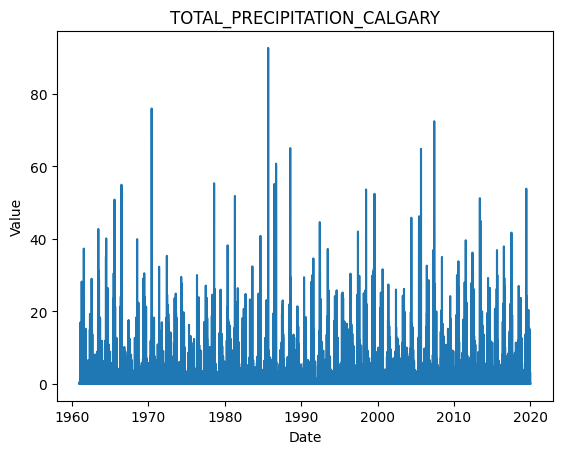

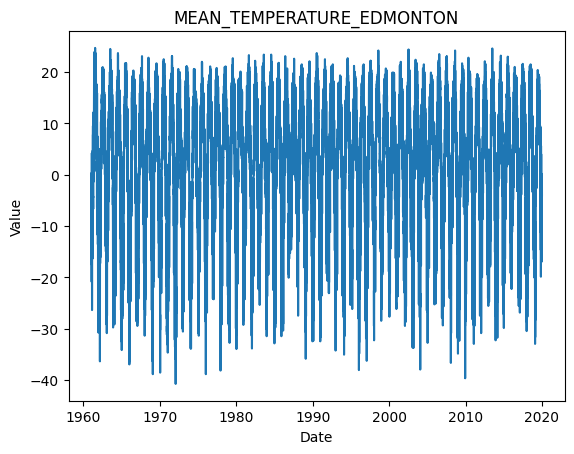

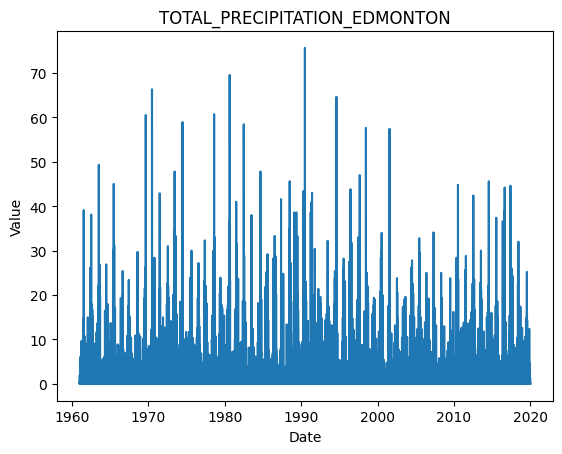

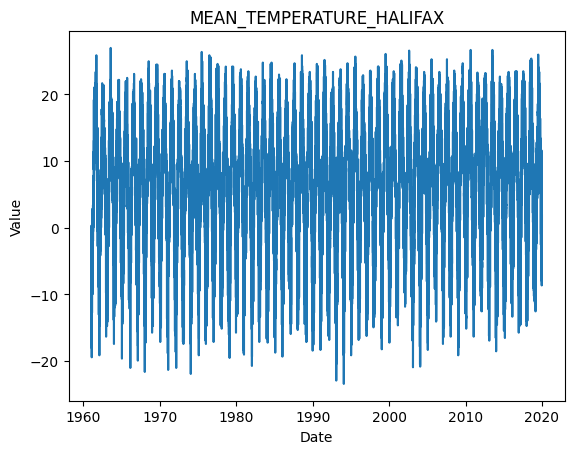

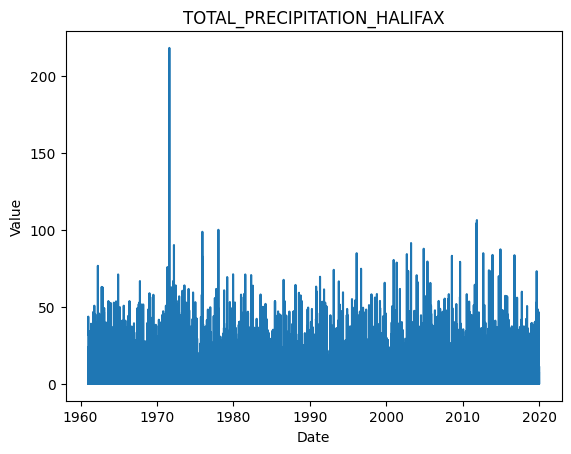

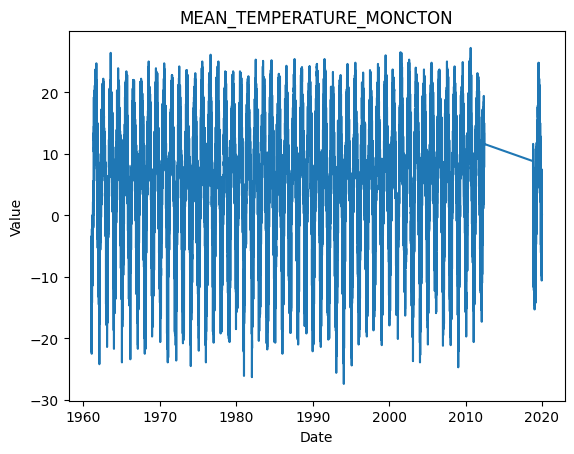

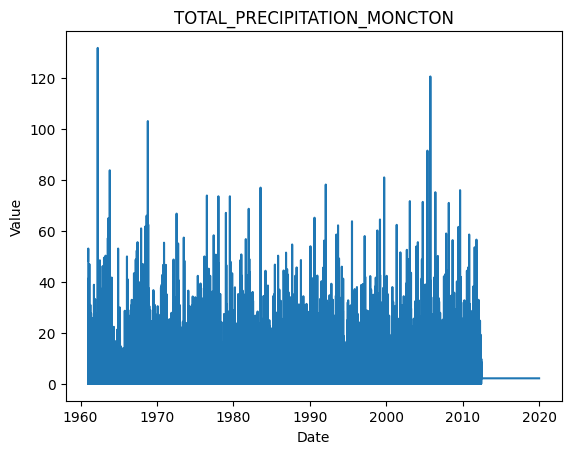

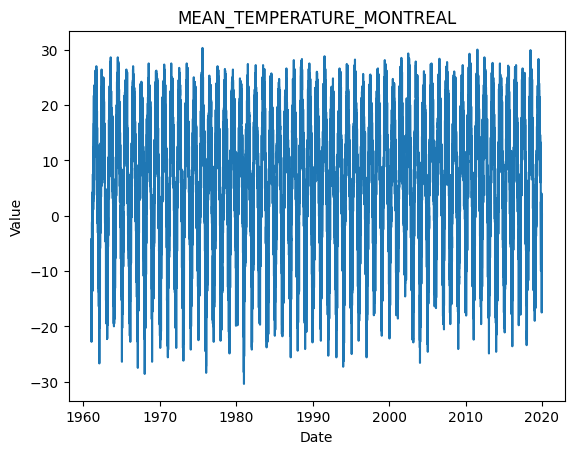

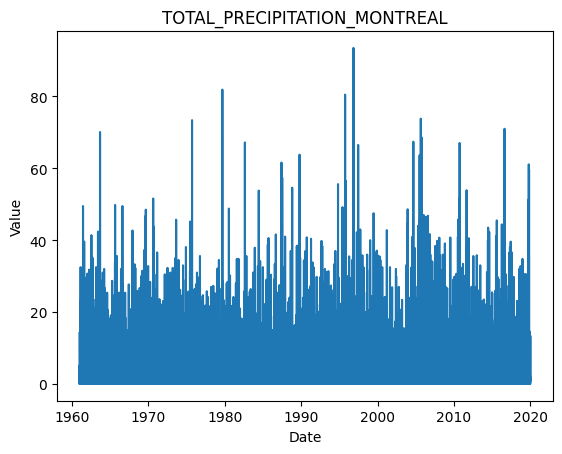

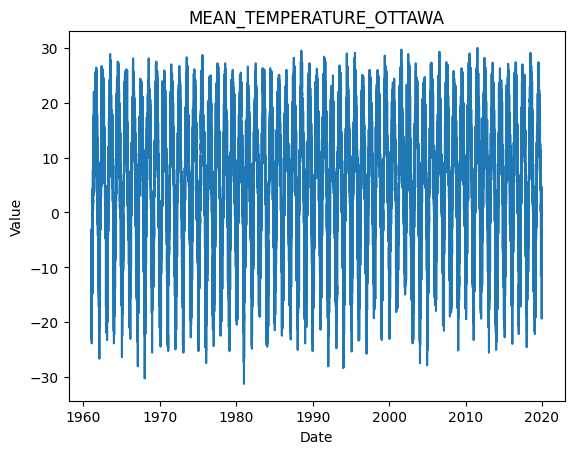

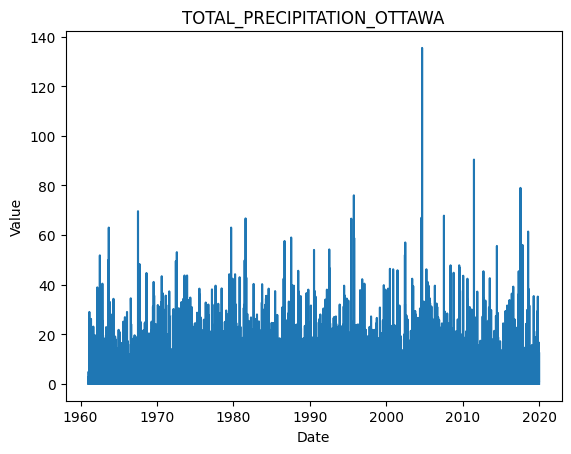

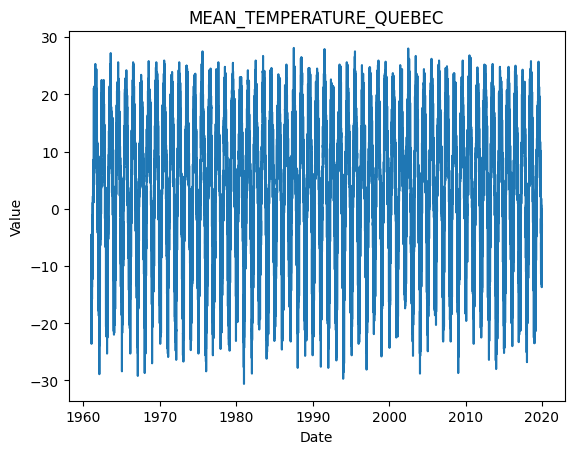

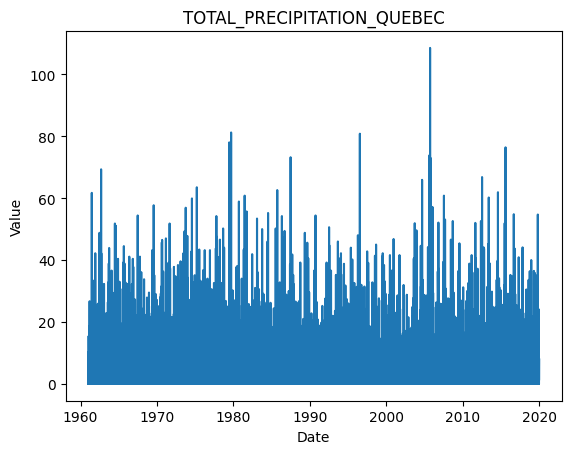

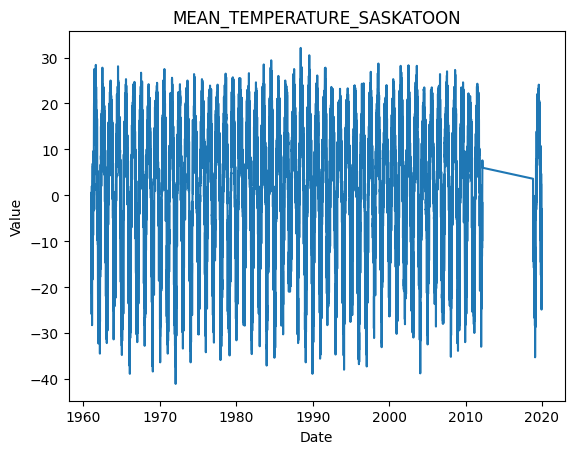

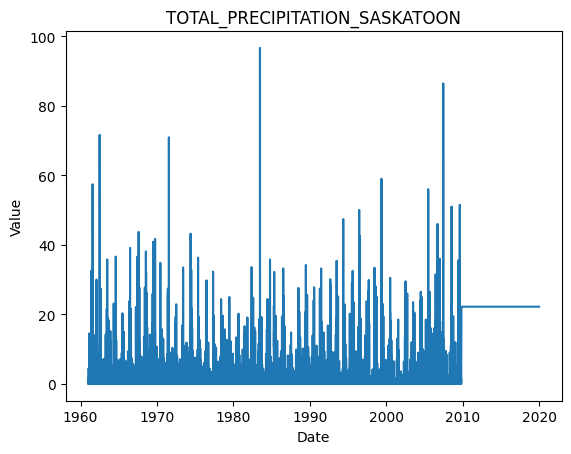

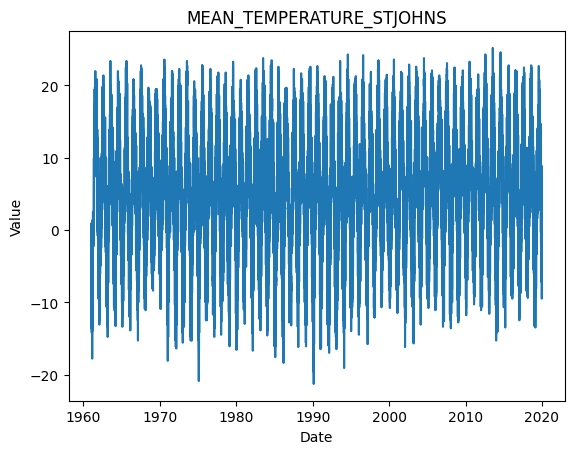

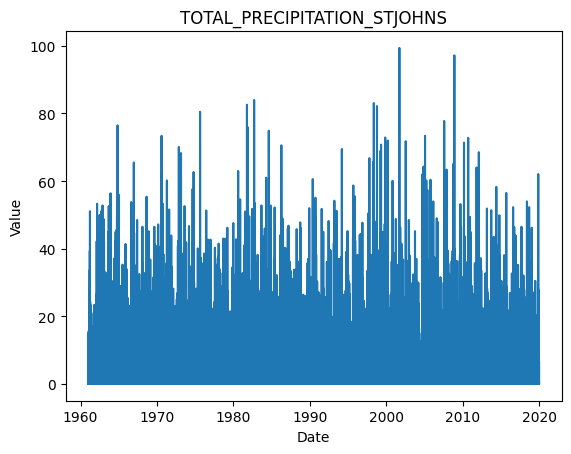

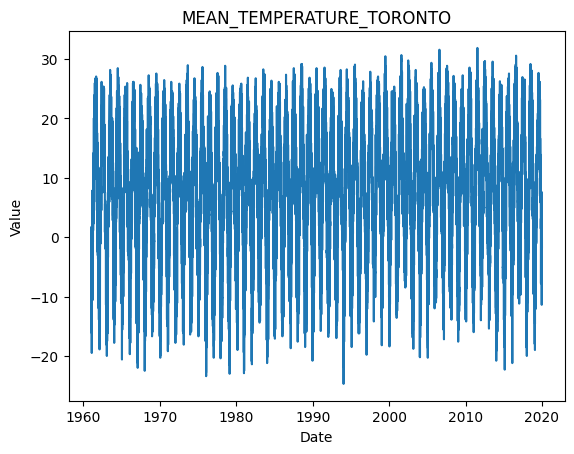

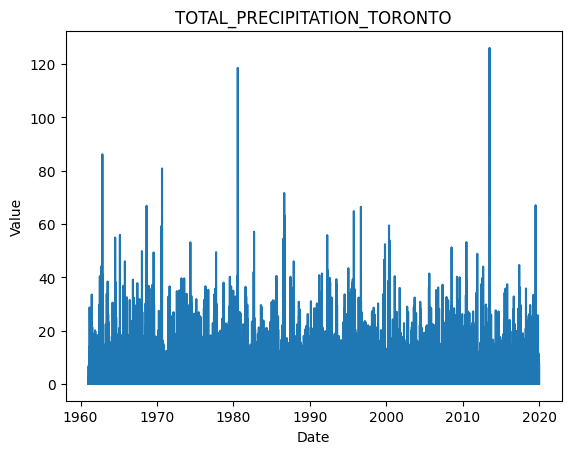

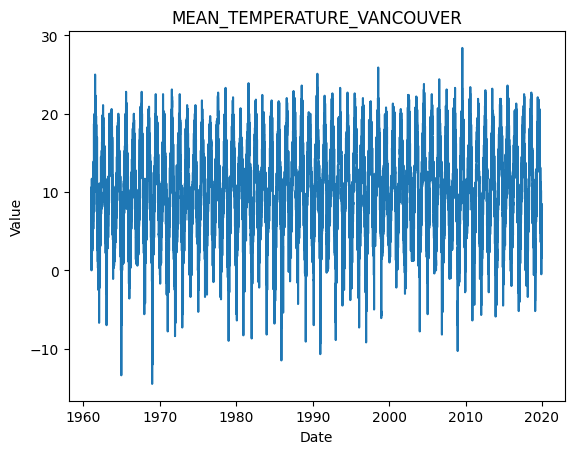

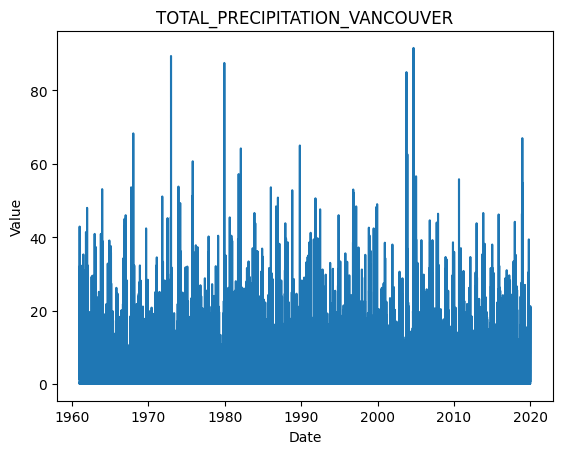

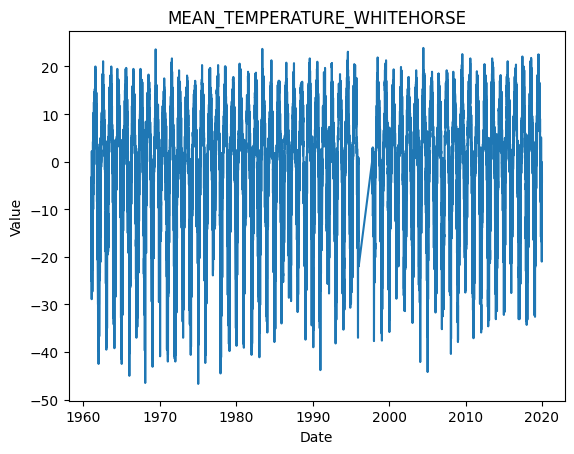

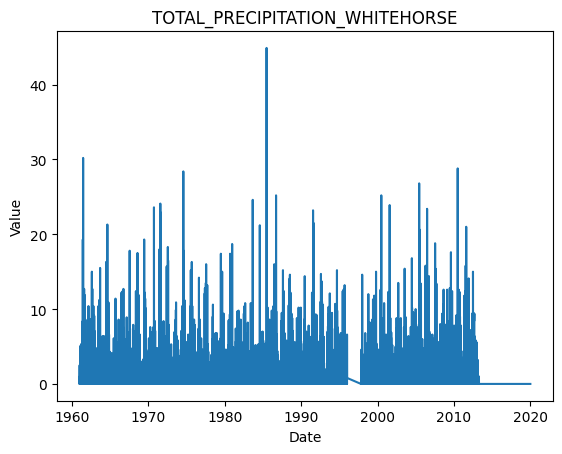

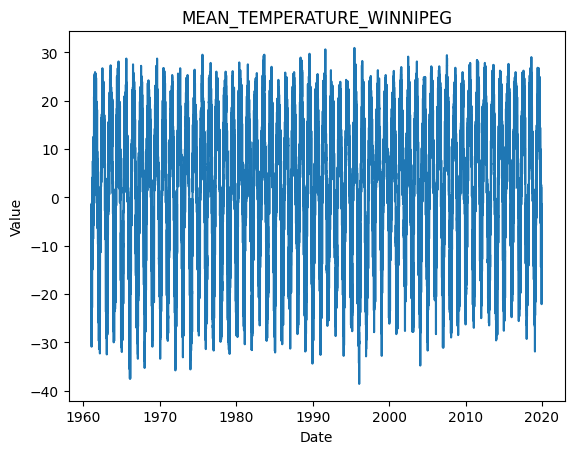

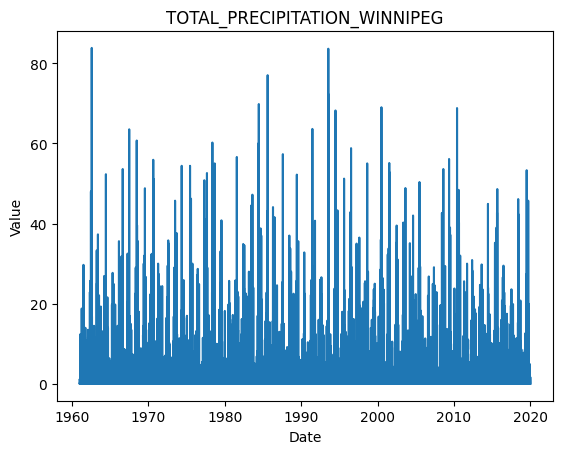

In [20]:
import matplotlib.pyplot as plt

for column in time_impute:
  # create a line plot of the time series data
  plt.plot(time_impute.index, time_impute[column])

  plt.xlabel('Date')
  plt.ylabel('Value')

  plt.title(f'{column}')
  plt.show()

## Imputation using Deep learning 

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# split the dataframe into training and test sets
train_df, test_df = train_test_split(df, test_size=0.3)

# create the neural network model
inputs = Input(shape=(train_df.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(train_df.shape[1], activation=None)(x)
model = Model(inputs=inputs, outputs=x)
model.compile(optimizer='adam', loss='mse')

# train the model on the training set
model.fit(train_df.fillna(0), train_df.fillna(0), epochs=100)

# evaluate the model on the test set
test_loss = model.evaluate(test_df.fillna(0), test_df.fillna(0))
print('Test loss:', test_loss)

# use the model to predict the missing values
df_imputed = model.predict(df.fillna(0))
deep_learning_impute = pd.DataFrame(df_imputed, columns=df.columns)
deep_learning_impute[df.isnull()] = np.nan
print(deep_learning_impute)

Epoch 1/100
472/472 [==============================] - 3s 3ms/step - loss: 13.8705
Epoch 2/100
472/472 [==============================] - 2s 3ms/step - loss: 2.2657
Epoch 3/100
472/472 [==============================] - 2s 3ms/step - loss: 1.1481
Epoch 4/100
472/472 [==============================] - 2s 5ms/step - loss: 0.7399
Epoch 5/100
472/472 [==============================] - 3s 6ms/step - loss: 0.4786
Epoch 6/100
472/472 [==============================] - 2s 4ms/step - loss: 0.3489
Epoch 7/100
472/472 [==============================] - 2s 3ms/step - loss: 0.3052
Epoch 8/100
472/472 [==============================] - 1s 3ms/step - loss: 0.2056
Epoch 9/100
472/472 [==============================] - 1s 3ms/step - loss: 0.1793
Epoch 10/100
472/472 [==============================] - 2s 4ms/step - loss: 0.1657
Epoch 11/100
472/472 [==============================] - 2s 5ms/step - loss: 0.1683
Epoch 12/100
472/472 [==============================] - 1s 3ms/step - loss: 0.1108
Epoch 13/100

In [22]:
deep_learning_impute.isna().sum()

MEAN_TEMPERATURE_CALGARY          0
TOTAL_PRECIPITATION_CALGARY       0
MEAN_TEMPERATURE_EDMONTON         0
TOTAL_PRECIPITATION_EDMONTON      0
MEAN_TEMPERATURE_HALIFAX          0
TOTAL_PRECIPITATION_HALIFAX       0
MEAN_TEMPERATURE_MONCTON          0
TOTAL_PRECIPITATION_MONCTON       0
MEAN_TEMPERATURE_MONTREAL         0
TOTAL_PRECIPITATION_MONTREAL      0
MEAN_TEMPERATURE_OTTAWA           0
TOTAL_PRECIPITATION_OTTAWA        0
MEAN_TEMPERATURE_QUEBEC           0
TOTAL_PRECIPITATION_QUEBEC        0
MEAN_TEMPERATURE_SASKATOON        0
TOTAL_PRECIPITATION_SASKATOON     0
MEAN_TEMPERATURE_STJOHNS          0
TOTAL_PRECIPITATION_STJOHNS       0
MEAN_TEMPERATURE_TORONTO          0
TOTAL_PRECIPITATION_TORONTO       0
MEAN_TEMPERATURE_VANCOUVER        0
TOTAL_PRECIPITATION_VANCOUVER     0
MEAN_TEMPERATURE_WHITEHORSE       0
TOTAL_PRECIPITATION_WHITEHORSE    0
MEAN_TEMPERATURE_WINNIPEG         0
TOTAL_PRECIPITATION_WINNIPEG      0
dtype: int64

## Linear interpolation example

In [23]:
from scipy.interpolate import lagrange
import pandas as pd
import numpy as np
# create a sample dataframe with missing values
linear_df = pd.DataFrame({'value1': [1, 4, np.nan, 7, 9, np.nan, np.nan, 8, 9, 10],
                   'value2': [5, 2, 3, 4, np.nan, np.nan, 3, 8, 9, np.nan]})

# fill missing values with polynomial interpolation
df_interpolated = linear_df.interpolate(method='linear', order=2)

# print the original dataframe and the interpolated dataframe
print("Original dataframe:")
print(linear_df)
print("Interpolated dataframe:")
print(df_interpolated)

Original dataframe:
   value1  value2
0     1.0     5.0
1     4.0     2.0
2     NaN     3.0
3     7.0     4.0
4     9.0     NaN
5     NaN     NaN
6     NaN     3.0
7     8.0     8.0
8     9.0     9.0
9    10.0     NaN
Interpolated dataframe:
      value1    value2
0   1.000000  5.000000
1   4.000000  2.000000
2   5.500000  3.000000
3   7.000000  4.000000
4   9.000000  3.666667
5   8.666667  3.333333
6   8.333333  3.000000
7   8.000000  8.000000
8   9.000000  9.000000
9  10.000000  9.000000


In [24]:
linear_impute = df.interpolate(option='linear')

In [25]:
linear_impute

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,
1961-01-01,-7.5,0.0,-11.1,0.3,-0.6,32.0,-6.2,48.3,-10.3,14.2,...,-6.4,0.0,-5.6,0.0,4.5,0.3,-7.8,0.3,-27.0,1.0
1961-01-02,-5.0,0.0,-7.8,0.0,0.0,0.5,-4.7,2.5,-10.8,0.5,...,-2.8,14.5,-7.0,2.8,2.8,0.0,-3.3,0.0,-25.9,0.0
1961-01-03,3.1,0.0,-3.1,0.0,-3.9,4.1,-10.0,0.0,-12.8,0.3,...,-1.7,0.0,-5.6,0.8,3.1,1.8,-3.4,0.3,-23.3,0.0
1961-01-04,1.4,0.0,-2.5,0.0,-5.6,43.7,-7.8,53.1,-13.4,0.5,...,-1.4,8.6,-8.6,0.0,5.6,32.0,-4.8,0.0,-11.4,0.0
1961-01-05,2.0,0.0,-2.5,0.0,-9.2,0.5,-10.8,0.0,-15.3,0.0,...,-1.4,1.5,-6.4,0.0,6.1,14.0,-16.1,0.0,-8.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,-7.7,0.0,-10.4,0.0,2.1,0.0,0.5,2.2,1.3,0.0,...,-4.3,5.3,3.0,0.2,5.3,3.0,-9.0,0.0,-4.7,0.0
2019-12-29,-3.3,0.0,-8.6,0.0,-2.7,0.0,-3.8,2.2,-0.9,0.0,...,-0.9,5.6,1.1,7.8,7.1,2.4,-2.8,0.0,-10.6,1.7
2019-12-30,-1.6,0.0,-10.3,0.0,-3.5,0.0,-4.1,2.2,-2.3,13.4,...,-0.7,0.7,5.6,8.0,7.5,5.8,-0.1,0.0,-10.9,0.1


In [26]:
linear_impute.isna().sum()

MEAN_TEMPERATURE_CALGARY          0
TOTAL_PRECIPITATION_CALGARY       0
MEAN_TEMPERATURE_EDMONTON         0
TOTAL_PRECIPITATION_EDMONTON      0
MEAN_TEMPERATURE_HALIFAX          0
TOTAL_PRECIPITATION_HALIFAX       0
MEAN_TEMPERATURE_MONCTON          0
TOTAL_PRECIPITATION_MONCTON       0
MEAN_TEMPERATURE_MONTREAL         0
TOTAL_PRECIPITATION_MONTREAL      0
MEAN_TEMPERATURE_OTTAWA           0
TOTAL_PRECIPITATION_OTTAWA        0
MEAN_TEMPERATURE_QUEBEC           0
TOTAL_PRECIPITATION_QUEBEC        0
MEAN_TEMPERATURE_SASKATOON        0
TOTAL_PRECIPITATION_SASKATOON     0
MEAN_TEMPERATURE_STJOHNS          0
TOTAL_PRECIPITATION_STJOHNS       0
MEAN_TEMPERATURE_TORONTO          0
TOTAL_PRECIPITATION_TORONTO       0
MEAN_TEMPERATURE_VANCOUVER        0
TOTAL_PRECIPITATION_VANCOUVER     0
MEAN_TEMPERATURE_WHITEHORSE       0
TOTAL_PRECIPITATION_WHITEHORSE    0
MEAN_TEMPERATURE_WINNIPEG         0
TOTAL_PRECIPITATION_WINNIPEG      0
dtype: int64

# Time series decomposition
Technique used to break down a time series into its constituent components, namely trend, seasonality, and residual or noise. The purpose of decomposition is to better understand the patterns and underlying structure of the time series, and to aid in forecasting future values.

There are two main approaches to time series decomposition: additive and multiplicative.

In the additive approach, the time series is decomposed into the sum of its trend, seasonal, and residual components, such that:

y(t) = Trend + Seasonality + Residual

In the multiplicative approach, the time series is decomposed into the product of its trend, seasonal, and residual components, such that:

y(t) = Trend x Seasonality x Residual

## The time series weather data is seasonal but not with similar trend every year. 
As it's not a stock or product price/demand we're trying to predict. There's no trend inside data which we saw in above visualizations due to which we're taking deep learning algorithm instead of statistical methods like ARIMA etc.

Visualizing the data between 2years

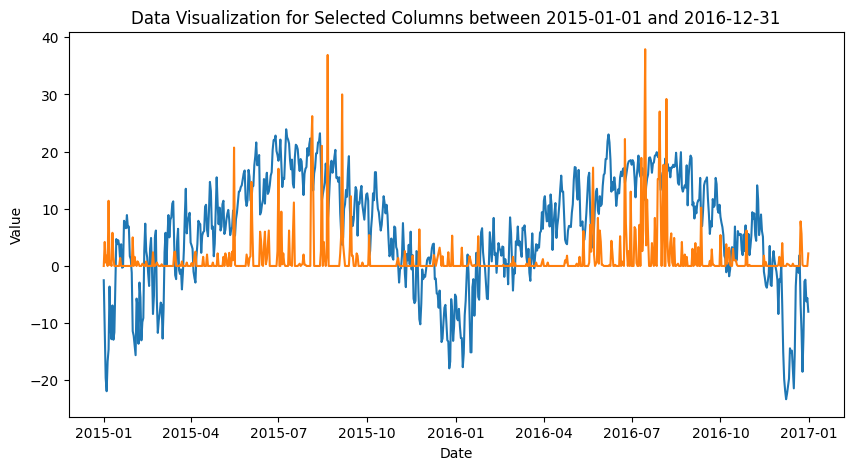

In [27]:
import matplotlib.pyplot as plt

# Set the start and end date for the time period
start_date = '2015-01-01'
end_date = '2016-12-31'

# Select the columns to visualize
columns_to_visualize = ['MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data for the selected columns between the given time period
ax.plot(time_impute[start_date:end_date][columns_to_visualize])

# Set the title and axis labels
ax.set_title('Data Visualization for Selected Columns between {} and {}'.format(start_date, end_date))
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Display the plot
plt.show()

In [28]:
deep_learning_impute.describe()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
count,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,...,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000
mean,4.315051,1.142212,2.136921,1.190964,6.480893,4.051277,4.418347,2.945715,6.458728,2.625559,...,4.926543,3.963820,7.914000,2.190595,10.169219,3.164926,-0.384486,0.535659,3.090703,1.478672
std,10.941216,3.769551,12.137328,3.860486,9.585861,9.276052,10.004153,7.213962,11.823292,6.156718,...,8.191199,8.102234,10.707553,5.543652,5.807248,6.484632,12.490768,1.841713,14.555858,4.692692
min,-36.441391,-1.264037,-40.432098,-1.029176,-23.080904,-1.308944,-27.123440,-0.664483,-30.653341,-1.110346,...,-20.888744,-1.803333,-24.741610,-1.018311,-14.559504,-0.746457,-46.605518,-0.679488,-39.251183,-0.755880
25%,-2.068163,-0.010872,-5.775036,-0.052608,-0.728307,0.072008,-1.672541,0.014704,-2.405577,-0.037254,...,-1.139231,-0.077707,-0.157552,0.026490,5.903228,-0.015747,-7.740419,-0.098323,-7.981333,0.041673
50%,5.474283,0.020711,3.926582,-0.011921,6.784814,0.181230,3.429767,0.063346,7.316241,0.079792,...,4.471230,0.439167,8.200511,0.097022,9.935583,0.088259,1.191400,-0.061841,4.917366,0.093707
75%,13.129488,0.413583,12.291573,0.500991,14.708489,3.049363,13.007966,2.025981,16.775165,2.063721,...,11.438937,4.190009,17.203266,1.363651,14.998366,3.485713,9.645841,0.189964,15.767068,0.596609
max,26.333279,92.278656,24.392517,75.182945,26.930365,219.145721,26.679138,132.195206,29.831207,92.420090,...,25.196039,99.041512,31.868761,126.153877,28.316038,91.171608,23.836432,44.149014,31.170176,83.958801


Ranges of data

In [29]:
deep_learning_impute.describe().loc['max'] - deep_learning_impute.describe().loc['min']

MEAN_TEMPERATURE_CALGARY           62.774670
TOTAL_PRECIPITATION_CALGARY        93.542693
MEAN_TEMPERATURE_EDMONTON          64.824615
TOTAL_PRECIPITATION_EDMONTON       76.212121
MEAN_TEMPERATURE_HALIFAX           50.011269
TOTAL_PRECIPITATION_HALIFAX       220.454665
MEAN_TEMPERATURE_MONCTON           53.802578
TOTAL_PRECIPITATION_MONCTON       132.859689
MEAN_TEMPERATURE_MONTREAL          60.484549
TOTAL_PRECIPITATION_MONTREAL       93.530435
MEAN_TEMPERATURE_OTTAWA            60.814430
TOTAL_PRECIPITATION_OTTAWA        136.669399
MEAN_TEMPERATURE_QUEBEC            58.588266
TOTAL_PRECIPITATION_QUEBEC        109.330444
MEAN_TEMPERATURE_SASKATOON         72.415417
TOTAL_PRECIPITATION_SASKATOON      97.246570
MEAN_TEMPERATURE_STJOHNS           46.084784
TOTAL_PRECIPITATION_STJOHNS       100.844844
MEAN_TEMPERATURE_TORONTO           56.610371
TOTAL_PRECIPITATION_TORONTO       127.172188
MEAN_TEMPERATURE_VANCOUVER         42.875542
TOTAL_PRECIPITATION_VANCOUVER      91.918065
MEAN_TEMPE

# Building the models

## Model 1: 
Deep learning imputed data

In [30]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(deep_learning_impute)

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the window size
window_size = 2

# Create the input and output data for the model
def create_dataset(data, window_size):
    X, Y = [], []
    for i in range(len(data)-window_size-1):
        X.append(data[i:(i+window_size)])
        Y.append(data[i+window_size])
    return np.array(X), np.array(Y)

train_X, train_Y = create_dataset(train_data, window_size)
test_X, test_Y = create_dataset(test_data, window_size)

# Reshape the input data for LSTM
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 26))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 26))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 26)))
model.add(LSTM(45, return_sequences=True))
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30))
model.add(Dense(26))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(train_X, train_Y, epochs=30, batch_size=64)

# Make predictions on the test set
predictions = model.predict(test_X)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(np.mean((predictions - test_Y)**2))
print("RMSE:", rmse)


Epoch 1/30
236/236 [==============================] - 21s 25ms/step - loss: 0.1413
Epoch 2/30
236/236 [==============================] - 5s 20ms/step - loss: 0.0315
Epoch 3/30
236/236 [==============================] - 5s 21ms/step - loss: 0.0187
Epoch 4/30
236/236 [==============================] - 4s 18ms/step - loss: 0.0182
Epoch 5/30
236/236 [==============================] - 5s 22ms/step - loss: 0.0176
Epoch 6/30
236/236 [==============================] - 5s 19ms/step - loss: 0.0174
Epoch 7/30
236/236 [==============================] - 4s 18ms/step - loss: 0.0169
Epoch 8/30
236/236 [==============================] - 5s 22ms/step - loss: 0.0162
Epoch 9/30
236/236 [==============================] - 4s 18ms/step - loss: 0.0158
Epoch 10/30
236/236 [==============================] - 4s 18ms/step - loss: 0.0156
Epoch 11/30
236/236 [==============================] - 5s 23ms/step - loss: 0.0155
Epoch 12/30
236/236 [==============================] - 4s 19ms/step - loss: 0.0154
Epoch 13/30


An ```RMSE``` of 0.13 shows the model is performing great.

In [31]:
train_data.shape, test_data.shape

((15084, 26), (6466, 26))

In [32]:
ssr = np.sum((predictions - test_Y)**2)
sst = np.sum((test_Y - np.mean(test_Y, axis=0))**2)
r2 = 1 - (ssr / sst)
print("R-squared:", r2)

# Comparing with the baseline model
baseline_rmse = np.sqrt(np.mean((test_Y[1:] - test_Y[:-1])**2))
baseline_r2 = 1 - ((baseline_rmse / np.std(test_Y[:-1]))**2)
print("Baseline R-squared:", baseline_r2)

R-squared: 0.7391177117824554
Baseline R-squared: 0.9578533403464462


Those are pretty great results. As per the model we trained 80% of data & in test data we asked the model to predict weather by keeping sliding window for every 2days.

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 50)             15400     
                                                                 
 lstm_1 (LSTM)               (None, 2, 45)             17280     
                                                                 
 lstm_2 (LSTM)               (None, 2, 40)             13760     
                                                                 
 lstm_3 (LSTM)               (None, 2, 35)             10640     
                                                                 
 lstm_4 (LSTM)               (None, 2, 30)             7920      
                                                                 
 lstm_5 (LSTM)               (None, 30)                7320      
                                                                 
 dense_6 (Dense)             (None, 26)                8

## Model 2: 
Time interpolation imputed data

In [34]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(time_impute)

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the window size
window_size = 2

# Create the input and output data for the model
def create_dataset(data, window_size):
    X, Y = [], []
    for i in range(len(data)-window_size-1):
        X.append(data[i:(i+window_size)])
        Y.append(data[i+window_size])
    return np.array(X), np.array(Y)

train_X, train_Y = create_dataset(train_data, window_size)
test_X, test_Y = create_dataset(test_data, window_size)

# Reshape the input data for LSTM
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 26))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 26))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 26)))
model.add(LSTM(45, return_sequences=True))
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30))
model.add(Dense(26))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(train_X, train_Y, epochs=30, batch_size=64)

# Make predictions on the test set
predictions = model.predict(test_X)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(np.mean((predictions - test_Y)**2))
print("RMSE:", rmse)


Epoch 1/30
236/236 [==============================] - 19s 20ms/step - loss: 0.1437
Epoch 2/30
236/236 [==============================] - 5s 21ms/step - loss: 0.0315
Epoch 3/30
236/236 [==============================] - 5s 22ms/step - loss: 0.0190
Epoch 4/30
236/236 [==============================] - 8s 35ms/step - loss: 0.0187
Epoch 5/30
236/236 [==============================] - 5s 19ms/step - loss: 0.0184
Epoch 6/30
236/236 [==============================] - 5s 23ms/step - loss: 0.0177
Epoch 7/30
236/236 [==============================] - 5s 20ms/step - loss: 0.0176
Epoch 8/30
236/236 [==============================] - 5s 20ms/step - loss: 0.0174
Epoch 9/30
236/236 [==============================] - 6s 24ms/step - loss: 0.0173
Epoch 10/30
236/236 [==============================] - 4s 19ms/step - loss: 0.0167
Epoch 11/30
236/236 [==============================] - 5s 19ms/step - loss: 0.0160
Epoch 12/30
236/236 [==============================] - 5s 22ms/step - loss: 0.0157
Epoch 13/30


In [35]:
ssr = np.sum((predictions - test_Y)**2)
sst = np.sum((test_Y - np.mean(test_Y, axis=0))**2)
r2 = 1 - (ssr / sst)
print("R-squared:", r2)

# Comparing with the baseline model
baseline_rmse = np.sqrt(np.mean((test_Y[1:] - test_Y[:-1])**2))
baseline_r2 = 1 - ((baseline_rmse / np.std(test_Y[:-1]))**2)
print("Baseline R-squared:", baseline_r2)

R-squared: 0.7158960252338709
Baseline R-squared: 0.9606807632344835


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 50)             15400     
                                                                 
 lstm_7 (LSTM)               (None, 2, 45)             17280     
                                                                 
 lstm_8 (LSTM)               (None, 2, 40)             13760     
                                                                 
 lstm_9 (LSTM)               (None, 2, 35)             10640     
                                                                 
 lstm_10 (LSTM)              (None, 2, 30)             7920      
                                                                 
 lstm_11 (LSTM)              (None, 30)                7320      
                                                                 
 dense_7 (Dense)             (None, 26)               

## Model 3:
Linear imputed data

In [37]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(linear_impute)

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the window size
window_size = 2

# Create the input and output data for the model
def create_dataset(data, window_size):
    X, Y = [], []
    for i in range(len(data)-window_size-1):
        X.append(data[i:(i+window_size)])
        Y.append(data[i+window_size])
    return np.array(X), np.array(Y)

train_X, train_Y = create_dataset(train_data, window_size)
test_X, test_Y = create_dataset(test_data, window_size)

# Reshape the input data for LSTM
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 26))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 26))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 26)))
model.add(LSTM(45, return_sequences=True))
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(30, return_sequences=True))
model.add(LSTM(30))
model.add(Dense(26))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(train_X, train_Y, epochs=30, batch_size=64)

# Make predictions on the test set
predictions = model.predict(test_X)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(np.mean((predictions - test_Y)**2))
print("RMSE:", rmse)


Epoch 1/30
236/236 [==============================] - 21s 21ms/step - loss: 0.1493
Epoch 2/30
236/236 [==============================] - 5s 22ms/step - loss: 0.0308
Epoch 3/30
236/236 [==============================] - 6s 24ms/step - loss: 0.0188
Epoch 4/30
236/236 [==============================] - 5s 22ms/step - loss: 0.0184
Epoch 5/30
236/236 [==============================] - 6s 24ms/step - loss: 0.0179
Epoch 6/30
236/236 [==============================] - 5s 21ms/step - loss: 0.0175
Epoch 7/30
236/236 [==============================] - 6s 24ms/step - loss: 0.0172
Epoch 8/30
236/236 [==============================] - 6s 23ms/step - loss: 0.0165
Epoch 9/30
236/236 [==============================] - 5s 21ms/step - loss: 0.0158
Epoch 10/30
236/236 [==============================] - 6s 25ms/step - loss: 0.0156
Epoch 11/30
236/236 [==============================] - 5s 21ms/step - loss: 0.0154
Epoch 12/30
236/236 [==============================] - 6s 26ms/step - loss: 0.0154
Epoch 13/30


In [38]:
ssr = np.sum((predictions - test_Y)**2)
sst = np.sum((test_Y - np.mean(test_Y, axis=0))**2)
r2 = 1 - (ssr / sst)
print("R-squared:", r2)

# Comparing with the baseline model
baseline_rmse = np.sqrt(np.mean((test_Y[1:] - test_Y[:-1])**2))
baseline_r2 = 1 - ((baseline_rmse / np.std(test_Y[:-1]))**2)
print("Baseline R-squared:", baseline_r2)

R-squared: 0.69240954113182
Baseline R-squared: 0.9606807632344835


In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 50)             15400     
                                                                 
 lstm_13 (LSTM)              (None, 2, 45)             17280     
                                                                 
 lstm_14 (LSTM)              (None, 2, 40)             13760     
                                                                 
 lstm_15 (LSTM)              (None, 2, 35)             10640     
                                                                 
 lstm_16 (LSTM)              (None, 2, 30)             7920      
                                                                 
 lstm_17 (LSTM)              (None, 30)                7320      
                                                                 
 dense_8 (Dense)             (None, 26)               

By Observing all the models we can see that imputed data by deep learning produced better results of R-squared values.

Why use RNN?

Deep learning models, such as LSTM (Type in RNN) networks, can be useful for time series forecasting when the data has complex nonlinear patterns and dependencies that are difficult to model using traditional statistical methods. These models are able to learn from the historical data and capture these complex patterns, making them well-suited for a variety of time series forecasting tasks.

# The MIT License
Copyright Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.